In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id','item_id','rating','timestamp']

In [3]:
df = pd.read_csv(r'ml-100k\u.data',sep='\t',names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movie_titles = pd.read_csv('ml-100k\Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_titles,on='item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
sns.set_style('white')

In [12]:
%matplotlib inline

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [16]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [18]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

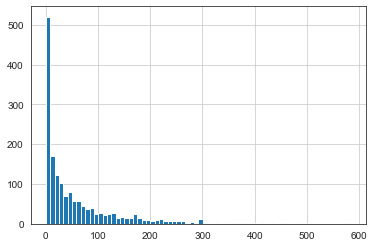

In [19]:
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

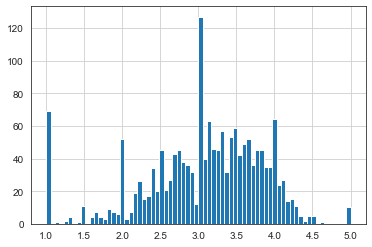

In [20]:
ratings['rating'].hist(bins=70)

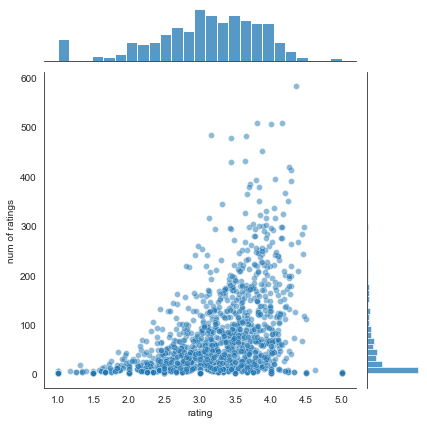

In [21]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [22]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [23]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [24]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [28]:
starwars_user_ratings = moviemat['101 Dalmatians (1996)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [29]:
starwars_user_ratings.head()

user_id
1    2.0
2    NaN
3    NaN
4    NaN
5    2.0
Name: 101 Dalmatians (1996), dtype: float64

In [30]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)


c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [33]:
corr_starwars.head()
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [34]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Hard Rain (1998),1.0,31
"Winter Guest, The (1997)",1.0,9
Fatal Instinct (1993),1.0,19
Faithful (1996),1.0,10
Trial by Jury (1994),1.0,7
April Fool's Day (1986),1.0,15
House Party 3 (1994),1.0,9
Grateful Dead (1995),1.0,4
"Tie That Binds, The (1995)",1.0,7


In [35]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150


In [36]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [37]:
corr_liarliar.head()
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [38]:
corr_liarliar.sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
"Bonheur, Le (1965)",1.0,4
For Ever Mozart (1996),1.0,3
Crossfire (1947),1.0,4
Johnny 100 Pesos (1993),1.0,2
Moonlight and Valentino (1995),1.0,7
Mina Tannenbaum (1994),1.0,6
"Stranger, The (1994)",1.0,3
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0,3
Legal Deceit (1997),1.0,5


In [39]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
